__________________________

<img src="MAGIC-telescope-twitter.jpg" style="height:300px">


__________________________

__________________________

__________________________



 <h1 align="center">MAGIC gamma telescope</h1> 
 
 <h5 align="center">-See appendix for full code-</h5> 
 

__________________________

__________________________

__________________________

__________________________

__________________________

# Section 1: Data; Description, attributes, EDA, cleaning and engineering

1. Section describing data and summary of its attributes
 + summary of EDA and cleaning + feature engineering 
 ___________
 
### I will use an UCI Machine Learning Repository called 'MAGIC Gamma Telescope Data Set' found on: https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope

### Quote from data set description on how it was created: "The data set was generated by a Monte Carlo program, Corsika, described in D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers, Forschungszentrum Karlsruhe FZKA 6019 (1998)".

### It simulates "registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique." This is used to determine whether a specific particle is gamma rays, which is what we are interested in detecting, or whether it is from hadronic showers. 


####  Shape of data: The data consists of 19,020 rows and 11 columns. The target column is "Particle". The features are:
* major axis of ellipse [mm]
* minor axis of ellipse [mm]
* 10-log of sum of content of all pixels [in #phot]
* ratio of sum of two highest pixels over fSize  [ratio]
* ratio of highest pixel over fSize  [ratio]
* distance from highest pixel to center, projected onto major axis [mm]
* 3rd root of third moment along major axis  [mm] 
* 3rd root of third moment along minor axis  [mm]
* angle of major axis with vector to origin [deg]
* distance from origin to center of ellipse [mm]

#### Missing data: Luckily, no missing data. 

#### Data types: All features are of float64 dtype, however the target variable "Particle" was at first an object. This was encoded to int64, as 1's and 0's. 

#### Data cleaning: No cleaning required.

#### Feature engineering: Target column was binary encoded. 

#### Other findings: The proportions of particles is 65% gamma particles/35% hadronic particles. I also included a correlation matrix to look for correlations 

In [59]:
# Import
# Data wrangling 
import pandas as pd 
import numpy as np

# Import dataset 
index_name_list = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'Particle']
data = pd.read_csv('magic04.data', header = None, names = index_name_list)

# Displaying information and dataframe 
display(data.sample(5))
print('')
print('Rows:', data.shape[0], '\nColumns:', data.shape[1])

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Particle
14117,173.8320,20.7553,2.7920,0.3793,0.2607,-166.9680,-133.8120,-15.6473,41.8462,195.1290,h
12494,12.9003,9.3948,2.3795,0.7729,0.5069,14.4120,9.0063,-6.9351,6.2747,164.2364,h
15647,20.8382,10.2682,2.3404,0.6210,0.3356,4.0453,-15.9238,-2.9230,86.8812,222.9860,h
6833,88.9941,25.2279,3.5759,0.1567,0.0848,59.5501,82.8117,8.5703,0.3521,304.8850,g
4439,28.7324,14.6792,2.4683,0.4116,0.2398,29.0682,19.1661,-11.1933,4.0499,137.3870,g



Rows: 19020 
Columns: 11


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
fLength     19020 non-null float64
fWidth      19020 non-null float64
fSize       19020 non-null float64
fConc       19020 non-null float64
fConc1      19020 non-null float64
fAsym       19020 non-null float64
fM3Long     19020 non-null float64
fM3Trans    19020 non-null float64
fAlpha      19020 non-null float64
fDist       19020 non-null float64
Particle    19020 non-null object
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [18]:
display(data['Particle'].value_counts(normalize=True))

g    0.64837
h    0.35163
Name: Particle, dtype: float64

# Heatmap, correlation matrix

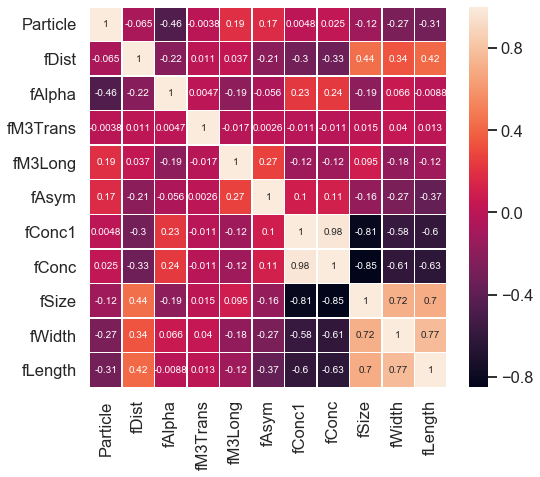

In [65]:
# Making a copy and changing target column to int
df = data.copy()
df['Particle'] = df['Particle'].replace('h', 0).replace('g',1)

# Imports
import pandas
import seaborn as sn
import matplotlib.pyplot as plt 
%matplotlib inline

# Plotting 
plt.figure(figsize=(8,7))
ax = sn.heatmap(df.corr(), annot=True, linewidth=0.5)
ax.set_xlim([11,0])
ax.set_ylim([0,11])
plt.show()

_________________________________

# Section 2: Main objectives of analysis + Prediction vs interpretability 
 
2. Paragraph detailing main objectives of analysis + focusing on prediction vs interpretability 

__________________

#### The main objective was to create a classifier, which was able to predict gamma patricles. It was a task of getting the most precise prediction. 

#### Therefore, my main concern was not interpretability. 

#### Furthermore, the data description states: "The simple classification accuracy is not meaningful for this data, since classifying a background event as signal is worse than classifying a signal event as background."

#### However, for mere technical traning, I will be including a classifcation report. Instead, I will also include an ROC curve as the data description suggests. 

_________________________________

# Section 3: Classification 

3. Section with different classifiers. Please look at appendix for workbook

 __________________________
 
 #### For all my classifiers, I used stratified train-test split as the target column was quite unevenly distributed. 
 
 #### I started with a decision tree classifier. I used Gridsearch to find the best max depth and max features per split. This changed the node count from 2861 to 523 and max depth from 35 to 9. Gridsearch also improved test predictions significantly in exchange for worse training predictions, but this is welcomed, as it was overfitting before. 
 
 #### The next classifier was an K-nearest neighbors classifier. Here, I used Gridsearch to find the appropriate number of K. I plotted an elbow-curve to find the optimal number visually. Also, I tried fitting with both scaled and unscaled data. As expected, the scaled classifier worked better, as it is sensitive to distances. This was not a problem for the decision tree, as it only considers information gain. 
 
 #### The last classifier was an ensemble method. I used random forest, a boostrap aggregating method for averaging out different decision trees. The out-of-bag error was minimized at 120 trees. Here, I also plotted feature relative importance, which is commented on in next section
 
 #### The ensemble method proved to be best on all metrics as expected. 
 #### The area-under-curve for the Receiver Operating Characteristics is 0.933 for Random Forest, 0.886 for both KNN and Decision Tree.

_________________________________

### Classification report

In [45]:
print('Gridsearch CV Decision Trees')
print(classification_report(y_test, y_test_pred_GR))
print('--------------------------------------------------------')
print('Scaled KNN')
print(classification_report(y_test, y_pred_knn_ss))
print('--------------------------------------------------------')
print('Random Forest')
print(classification_report(y_test, y_pred_RF))

Gridsearch CV Decision Trees
              precision    recall  f1-score   support

           0       0.81      0.71      0.76      2006
           1       0.85      0.91      0.88      3700

    accuracy                           0.84      5706
   macro avg       0.83      0.81      0.82      5706
weighted avg       0.84      0.84      0.84      5706

--------------------------------------------------------
Scaled KNN
              precision    recall  f1-score   support

           0       0.86      0.65      0.74      2006
           1       0.83      0.94      0.89      3700

    accuracy                           0.84      5706
   macro avg       0.85      0.80      0.81      5706
weighted avg       0.84      0.84      0.84      5706

--------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      2006
           1       0.89      0.93      0.91      3700

    accuracy  

### ROC curve

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.866
KNN: ROC AUC=0.886
Random Forest: ROC AUC=0.933


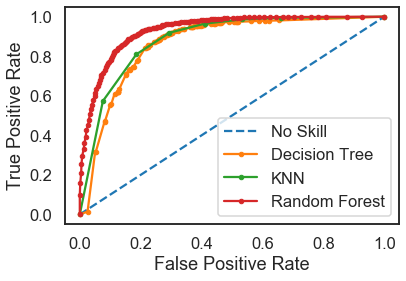

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot

# No skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# Probabilities 
dt_probs = GR.predict_proba(X_test)
knn_probs = knn_ss_2.predict_proba(X_test_ss)
RF_probs = RF_classifier.predict_proba(X_test)

# Only keep only probability for positive outcomes
dt_probs = dt_probs[:, 1]
knn_probs = knn_probs[:, 1]
RF_probs = RF_probs[:, 1]

# Calcuate scores 
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
RF_auc = roc_auc_score(y_test, RF_probs)

# Scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('Random Forest: ROC AUC=%.3f' % (RF_auc))

# ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)

# Plot ROC curves
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
pyplot.plot(RF_fpr, RF_tpr, marker='.', label='Random Forest')

# Axis, legend and plot
pyplot.xlabel('False Positive Rate'), pyplot.ylabel('True Positive Rate'), pyplot.legend(), pyplot.show();

_________________________________

# Section 4: Findings 

4. Section with clear findings related to the main objective 
 + Which classifier was best
 + Drives of model and insights 
 _____________________
 
 #### As seen, Random Forest gives the best predictions. This is expected as it is an ensemble method. 
 
#### In the last code section, I look at the relative feature importance of the fitted Random Forest. Here is the values (ca.):
* major axis of ellipse [mm]: 0.15
* minor axis of ellipse [mm]: 0.125
* 10-log of sum of content of all pixels [in #phot]: 0.10
* ratio of sum of two highest pixels over fSize  [ratio]: 0.08
* ratio of highest pixel over fSize  [ratio]: 0.05
* distance from highest pixel to center, projected onto major axis [mm]: 0.025
* 3rd root of third moment along major axis  [mm]: 0.08
* 3rd root of third moment along minor axis  [mm]: 0.05
* angle of major axis with vector to origin [deg]: 0.25
* distance from origin to center of ellipse [mm]: 0.05

The angle of major axis with vector to origin was the most important, followed by major axes of ellpise and minor eaxis of ellipse 


_________________________________

_________________________________

# Feature relative importance

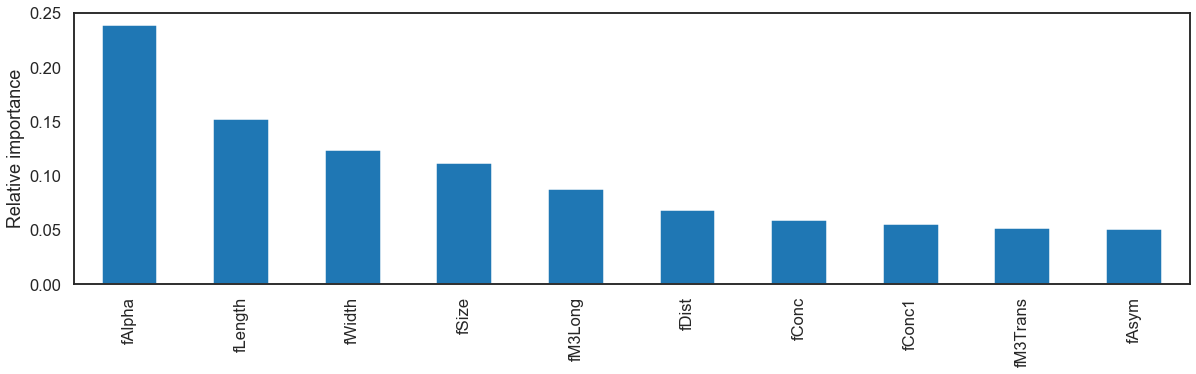

In [55]:
feature_plot = pd.Series(RF.feature_importances_, index=X.columns).sort_values(ascending=False)

ax = feature_plot.plot(kind='bar', figsize = (20,5))
ax.set(ylabel='Relative importance');

_________________________________

_________________________________

# Section 5: Possible flaws and plan to revisit 

5. Highlight possible flaws with model and a plan to revisit the analysis with other methods 
___________________________

#### To improve models, I could try to fiddle with more hyperparameters, or except try out Boosting and Stacking. 
#### It was also clear that the classes was unbalanced. I did, however, not try to fix this by upsampling, downsampling or blagging. 

_________________________________

# Thank you for reading

_________________________________

_________________________________

_________________________________

# Appendix: Workbook

# Train test split

In [21]:
# X and y

y = data['Particle'].replace('h', 0).replace('g',1)
X = data[[x for x in data.columns if x not in 'Particle']]

from sklearn.model_selection import StratifiedShuffleSplit

# Initialize object
sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.3)

# Create indexes 
train_index, test_index = next(sss.split(X, y))

# Assign set
X_train, X_test = X.loc[train_index], X.loc[test_index]
y_train, y_test = y.loc[train_index], y.loc[test_index]

In [71]:
display(data['Particle'].value_counts(normalize=True))
display(y_train.value_counts(normalize=True))
display(y_test.value_counts(normalize=True))

1    0.64837
0    0.35163
Name: Particle, dtype: float64

1    0.64834
0    0.35166
Name: Particle, dtype: float64

1    0.64844
0    0.35156
Name: Particle, dtype: float64

The stratified split worked

_________________________________

# START OF FIRST CLASSIFIER

# Fitting classifier: Decision Tree 

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Create instance
dt = DecisionTreeClassifier()

# Fit the classifier 
dt = dt.fit(X_train, y_train)

# Inspect it
dt.tree_.node_count, dt.tree_.max_depth

(2825, 35)

# Metrics

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

# Predict
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Inspect metrics 
metric_inspection_train = pd.Series({'Accuracy':accuracy_score(y_train, y_train_pred),
                                     'Precision':precision_score(y_train, y_train_pred),
                                     'Recall':recall_score(y_train, y_train_pred), 
                                     'F1':f1_score(y_train, y_train_pred)},
                                      name = 'train')

metric_inspection_test = pd.Series({'Accuracy':accuracy_score(y_test, y_test_pred),
                                    'Precision':precision_score(y_test, y_test_pred),
                                    'Recall':recall_score(y_test, y_test_pred), 
                                    'F1':f1_score(y_test, y_test_pred)},
                                     name = 'test')

metric_inspection = pd.concat([metric_inspection_train, metric_inspection_test], axis = 1)


# Print
metric_inspection

,train,test
Accuracy,1.0,0.812478
Precision,1.0,0.856755
Recall,1.0,0.853514
F1,1.0,0.855131


The classifier is clearly overfitting, which node count and depth also suggested

# Grid search with cross validation

In [24]:
from sklearn.model_selection import GridSearchCV

#Define params to try
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

# Create instance
GR = GridSearchCV(DecisionTreeClassifier(),
                  param_grid=param_grid,
                  scoring = 'accuracy',
                  n_jobs = -1)

# Fit object
GR = GR.fit(X_train, y_train)

# Inspection 
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

C:\Users\brosb\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


(535, 9)

A lot less than before, but still a lot

# Metrics with Gridsearch Cross Validation

In [25]:
#Predictions
y_train_pred_GR = GR.predict(X_train)
y_test_pred_GR = GR.predict(X_test)

# Inspect metrics 
metric_inspection_train = pd.Series({'Accuracy':accuracy_score(y_train, y_train_pred_GR),
                                     'Precision':precision_score(y_train, y_train_pred_GR),
                                     'Recall':recall_score(y_train, y_train_pred_GR), 
                                     'F1':f1_score(y_train, y_train_pred_GR)},
                                      name = 'train')

metric_inspection_test = pd.Series({'Accuracy':accuracy_score(y_test, y_test_pred_GR),
                                    'Precision':precision_score(y_test, y_test_pred_GR),
                                    'Recall':recall_score(y_test, y_test_pred_GR), 
                                    'F1':f1_score(y_test, y_test_pred_GR)},
                                     name = 'test')

#Inspection 
metric_inspection = pd.concat([metric_inspection_train, metric_inspection_test], axis = 1)

# Print
metric_inspection

,train,test
Accuracy,0.890717,0.840694
Precision,0.883182,0.852488
Recall,0.958179,0.912162
F1,0.919153,0.881316


The metrics of the train set looks a lot worse, however the test set has improved significantly. This is viewed as being an improvement

# The tree. Just for the visual effect :)

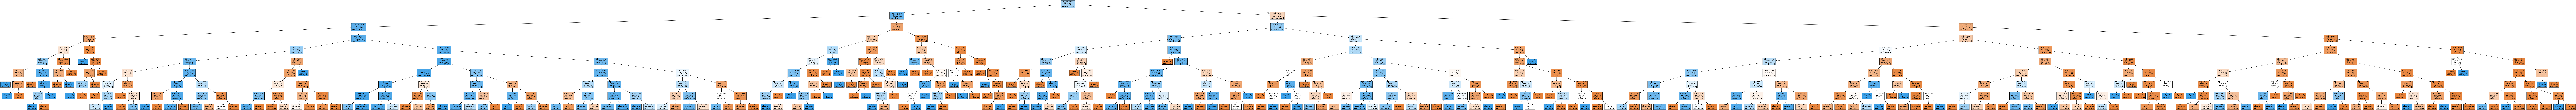

In [26]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Create an output destination for the file
dot_data = StringIO()

export_graphviz(GR.best_estimator_, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# View the tree image
filename = 'particle_tree_prune.png'
graph.write_png(filename)
Image(filename=filename) 

# END OF FIRST CLASSIFIER

_______________________________

# START OF SECOND CLASSIFIER

# Fitting classifier: KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier 

# Create an instance of class 
knn = KNeighborsClassifier()

# Fit 
knn = knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# TRYING WITH SCALED___________________________
from sklearn.preprocessing import StandardScaler

# Scaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

#Trying KNN again 
knn_ss = KNeighborsClassifier()
knn_ss = knn_ss.fit(X_train_ss, y_train)
y_pred_knn_ss = knn_ss.predict(X_test_ss)

# Metrics

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

print('Not scaled KNN')
print(classification_report(y_test, y_pred_knn))
print('-------------------------------------------------------------------')
print('Scaled KNN')
print(classification_report(y_test, y_pred_knn_ss))

Not scaled KNN
              precision    recall  f1-score   support

           0       0.80      0.60      0.68      2006
           1       0.81      0.92      0.86      3700

    accuracy                           0.80      5706
   macro avg       0.80      0.76      0.77      5706
weighted avg       0.80      0.80      0.80      5706

-------------------------------------------------------------------
Scaled KNN
              precision    recall  f1-score   support

           0       0.86      0.65      0.74      2006
           1       0.83      0.94      0.89      3700

    accuracy                           0.84      5706
   macro avg       0.85      0.80      0.81      5706
weighted avg       0.84      0.84      0.84      5706



As expected from KNN, this seems to improve the metrics

# Searching for better parameters

In [29]:
# Setting up
max_k = 40
f1_scores = list()
error_rates = list()

# Looping to find best k
for k in range(1, max_k):
    
    # KNN
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train_ss, y_train)
    
    #METRICS 
    y_pred = knn.predict(X_test_ss)
    
    #ERROR
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
# Making dataframe  
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

# Elbow curve

<Figure size 1800x1200 with 0 Axes>

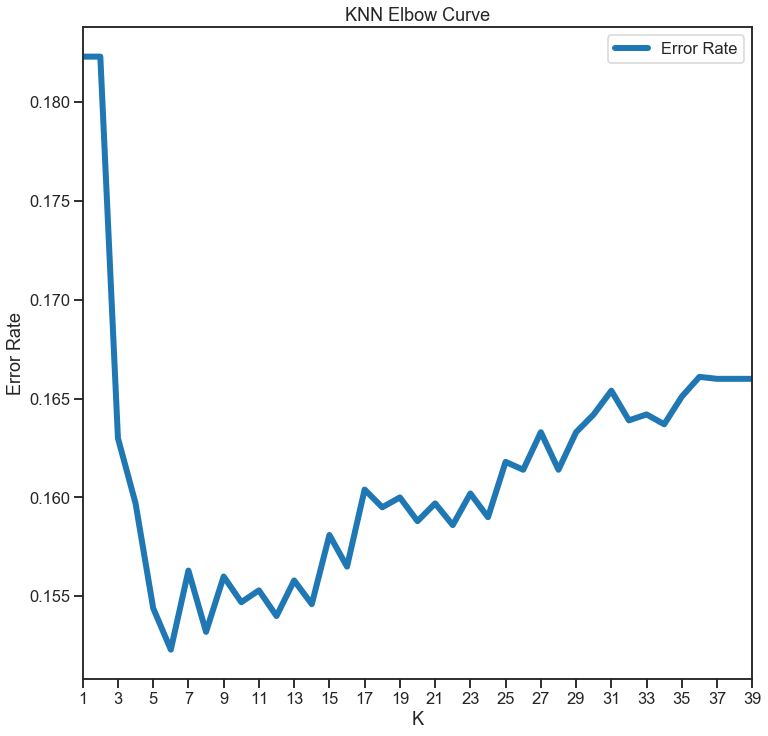

In [30]:
import seaborn as sns

# Plot Accuracy (Error Rate) results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
plt.savefig('knn_elbow.png');

K = 6 seems to be the best choice. This seems reasonable 

# Fitting new instance

In [51]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler

# Scaler
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

# Fitting for later use 
knn_ss_2 = KNeighborsClassifier(n_neighbors = 6)
knn_ss_2 = knn_ss_2.fit(X_train_ss, y_train)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score


#Predicting
y_pred_knn_ss_2 = knn_ss_2.predict(X_test_ss)

print('Scaled KNN')
print(classification_report(y_test, y_pred_knn_ss_2))

Scaled KNN
              precision    recall  f1-score   support

           0       0.83      0.71      0.76      2006
           1       0.85      0.92      0.88      3700

    accuracy                           0.84      5706
   macro avg       0.84      0.81      0.82      5706
weighted avg       0.84      0.84      0.84      5706



# END OF SECOND CLASSIFIER

_______________________________

# START OF THIRD CLASSIFIER

# Fitting ensemble: GradientBoostingClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize classifier
RF = RandomForestClassifier(oob_score = True, warm_start = True, n_jobs = -1)

# Setup
oob = list()

# Looping 
for n_trees in range(20, 200, 20):
    
    # Trying different number of trees
    RF.set_params(n_estimators = n_trees)
    
    # Fitting
    RF.fit(X_train, y_train)
    
    # OOB
    oob_error = 1- RF.oob_score_ 
    
    # Append
    oob.append(pd.Series({'# of trees': n_trees, 'OOB error': oob_error}))
    
oob_frame = pd.concat(oob, axis=1).T.set_index('# of trees')
oob_frame

C:\Users\brosb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\brosb\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


,OOB error
# of trees,
20.0,0.143007
40.0,0.132492
60.0,0.128286
80.0,0.126183
100.0,0.124606
120.0,0.124606
140.0,0.123930
160.0,0.123855
180.0,0.122878


# Out-of-bag error 

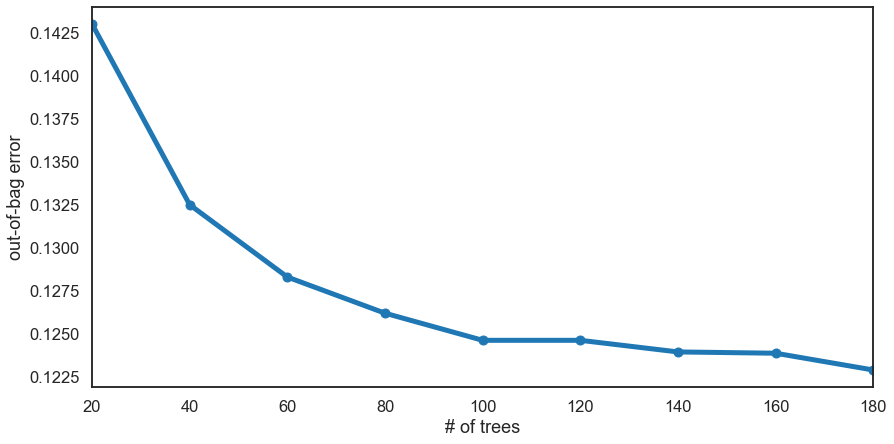

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_context('talk')
sns.set_style('white')

ax = oob_frame.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

# Metrics

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

RF_classifier = RandomForestClassifier(n_estimators = 120, warm_start = True, n_jobs = -1)
RF_classifier = RF_classifier.fit(X_train, y_train)
y_pred_RF = RF_classifier.predict(X_test)

print('Classification report')
print(classification_report(y_test, y_pred_RF))

Classification report
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      2006
           1       0.89      0.93      0.91      3700

    accuracy                           0.88      5706
   macro avg       0.88      0.86      0.86      5706
weighted avg       0.88      0.88      0.88      5706



# Feature relative importance

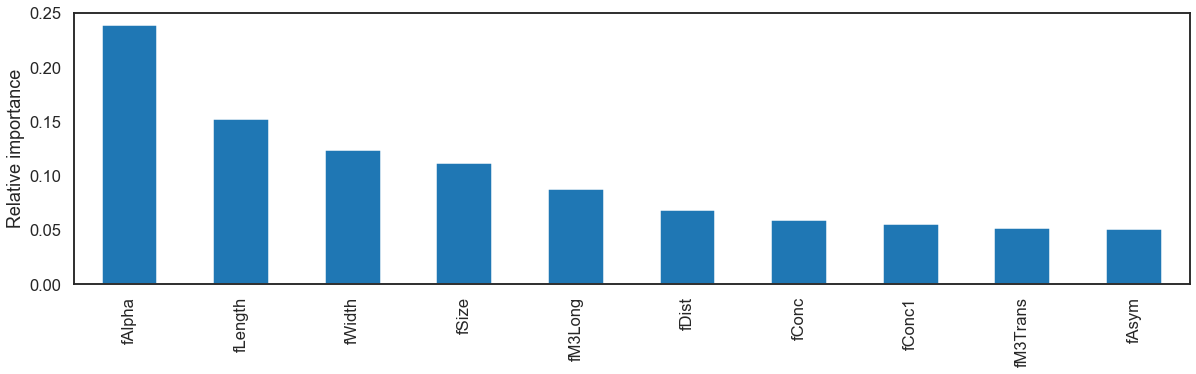

In [41]:
feature_plot = pd.Series(RF.feature_importances_, index=X.columns).sort_values(ascending=False)

ax = feature_plot.plot(kind='bar', figsize = (20,5))
ax.set(ylabel='Relative importance');

# END OF THIRD CLASSIFIER

_______________________________

# FINAL METRICS

In [43]:
print('Gridsearch CV Decision Trees')
print(classification_report(y_test, y_test_pred_GR))
print('--------------------------------------------------------')
print('Scaled KNN')
print(classification_report(y_test, y_pred_knn_ss))
print('--------------------------------------------------------')
print('Random Forest')
print(classification_report(y_test, y_pred_RF))

Gridsearch CV Decision Trees
              precision    recall  f1-score   support

           0       0.81      0.71      0.76      2006
           1       0.85      0.91      0.88      3700

    accuracy                           0.84      5706
   macro avg       0.83      0.81      0.82      5706
weighted avg       0.84      0.84      0.84      5706

--------------------------------------------------------
Scaled KNN
              precision    recall  f1-score   support

           0       0.86      0.65      0.74      2006
           1       0.83      0.94      0.89      3700

    accuracy                           0.84      5706
   macro avg       0.85      0.80      0.81      5706
weighted avg       0.84      0.84      0.84      5706

--------------------------------------------------------
Random Forest
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      2006
           1       0.89      0.93      0.91      3700

    accuracy  

# ROC

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.866
KNN: ROC AUC=0.886
Random Forest: ROC AUC=0.933


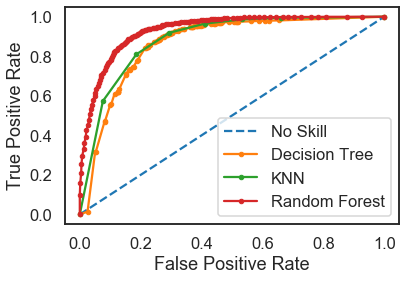

In [53]:
# ROC CURVE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# No skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# Probabilities 
dt_probs = GR.predict_proba(X_test)
knn_probs = knn_ss_2.predict_proba(X_test_ss)
RF_probs = RF_classifier.predict_proba(X_test)

# Only keep only probability for positive outcomes
dt_probs = dt_probs[:, 1]
knn_probs = knn_probs[:, 1]
RF_probs = RF_probs[:, 1]

# Calcuate scores 
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
RF_auc = roc_auc_score(y_test, RF_probs)

# Scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (dt_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
print('Random Forest: ROC AUC=%.3f' % (RF_auc))

# ROC curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
RF_fpr, RF_tpr, _ = roc_curve(y_test, RF_probs)

# Plot ROC curves
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
pyplot.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
pyplot.plot(RF_fpr, RF_tpr, marker='.', label='Random Forest')

# Axis
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# Legend 
pyplot.legend()

# Plot
pyplot.show()